# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress
from scipy import stats
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# May need to run 'pip install citipy' in terminal to use the citipy package
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#lat_range = (88, 90)
#lng_range = (178, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lats = np.random.uniform(low=60.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=160.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
len(cities)
url = "http://api.openweathermap.org/data/2.5/weather?"

temperature = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
max_temp = []
weather_cities = []

# OpenWeatherMap API has a limit of 60 calls/minute, so I'm setting a counter to stop at 50 and wait a minute

count = 1
sets = 1
t0 =time.time()

print("Beginning Data Retrieval")
print("----------------------------")

for x in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + x + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_response_json = weather_response.json()      
    try:
        city_id = weather_response_json["id"]
        print(f'Processing Record {count} of Set {sets} | City Id: {city_id} and City Name  {x}')
        temperature.append(weather_response_json["main"]["temp"])
        lat.append(weather_response_json["coord"]["lat"])
        lng.append(weather_response_json["coord"]["lon"])
        humidity.append(weather_response_json["main"]["humidity"])
        cloudiness.append(weather_response_json["clouds"]["all"])
        wind_speed.append(weather_response_json["wind"]["speed"])
        country.append(weather_response_json["sys"]["country"])
        date.append(weather_response_json["dt"])
        max_temp.append(weather_response_json["main"]["temp_max"])
        weather_cities.append(x)
    except KeyError:
        print(f"City not found. Skipping... {x}") 

    count = count+1
    if count == 51:
        t1=time.time()
        count = 1
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")   



Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | City Id: 2650435 and City Name  east grinstead
Processing Record 2 of Set 1 | City Id: 5855927 and City Name  hilo
Processing Record 3 of Set 1 | City Id: 2012530 and City Name  zhigansk
Processing Record 4 of Set 1 | City Id: 3143513 and City Name  oppdal
Processing Record 5 of Set 1 | City Id: 3694112 and City Name  paita
Processing Record 6 of Set 1 | City Id: 2071860 and City Name  esperance
Processing Record 7 of Set 1 | City Id: 3831208 and City Name  qaanaaq
Processing Record 8 of Set 1 | City Id: 962367 and City Name  richards bay
Processing Record 9 of Set 1 | City Id: 3572906 and City Name  andros town
Processing Record 10 of Set 1 | City Id: 1267390 and City Name  kavaratti
Processing Record 11 of Set 1 | City Id: 4032243 and City Name  vaini
Processing Record 12 of Set 1 | City Id: 1282256 and City Name  hithadhoo
Processing Record 13 of Set 1 | City Id: 3369157 and City Name  cape town
Pro

Processing Record 21 of Set 3 | City Id: 2031964 and City Name  darhan
Processing Record 22 of Set 3 | City Id: 1507390 and City Name  dikson
Processing Record 23 of Set 3 | City Id: 964420 and City Name  port elizabeth
Processing Record 24 of Set 3 | City Id: 739914 and City Name  sebinkarahisar
Processing Record 25 of Set 3 | City Id: 933995 and City Name  souillac
Processing Record 26 of Set 3 | City Id: 6165406 and City Name  thompson
Processing Record 27 of Set 3 | City Id: 5882953 and City Name  aklavik
Processing Record 28 of Set 3 | City Id: 2155415 and City Name  new norfolk
Processing Record 29 of Set 3 | City Id: 3691954 and City Name  sechura
Processing Record 30 of Set 3 | City Id: 1511276 and City Name  atagay
Processing Record 31 of Set 3 | City Id: 780687 and City Name  berlevag
Processing Record 32 of Set 3 | City Id: 6201424 and City Name  mataura
Processing Record 33 of Set 3 | City Id: 6170031 and City Name  tuktoyaktuk
Processing Record 34 of Set 3 | City Id: 51225

Processing Record 39 of Set 5 | City Id: 4021858 and City Name  guerrero negro
Processing Record 40 of Set 5 | City Id: 2236568 and City Name  uige
Processing Record 41 of Set 5 | City Id: 1624041 and City Name  ternate
Processing Record 42 of Set 5 | City Id: 2381972 and City Name  adrar
Processing Record 43 of Set 5 | City Id: 2065594 and City Name  mount isa
Processing Record 44 of Set 5 | City Id: 3380450 and City Name  roura
Processing Record 45 of Set 5 | City Id: 2084442 and City Name  vanimo
Processing Record 46 of Set 5 | City Id: 5017822 and City Name  bemidji
Processing Record 47 of Set 5 | City Id: 2397614 and City Name  ndende
Processing Record 48 of Set 5 | City Id: 3835869 and City Name  santiago del estero
Processing Record 49 of Set 5 | City Id: 2015352 and City Name  terney
City not found. Skipping... ust-kamchatsk
Processing Record 2 of Set 6 | City Id: 1153669 and City Name  chiang rai
Processing Record 3 of Set 6 | City Id: 3421982 and City Name  maniitsoq
Processi

Processing Record 10 of Set 8 | City Id: 2756669 and City Name  dordrecht
Processing Record 11 of Set 8 | City Id: 244878 and City Name  biltine
Processing Record 12 of Set 8 | City Id: 3372964 and City Name  lagoa
Processing Record 13 of Set 8 | City Id: 3374083 and City Name  bathsheba
Processing Record 14 of Set 8 | City Id: 304013 and City Name  mut
Processing Record 15 of Set 8 | City Id: 1685422 and City Name  sulangan
Processing Record 16 of Set 8 | City Id: 1259434 and City Name  polur
Processing Record 17 of Set 8 | City Id: 3203412 and City Name  brezice
Processing Record 18 of Set 8 | City Id: 1259395 and City Name  porbandar
Processing Record 19 of Set 8 | City Id: 1510689 and City Name  baykit
Processing Record 20 of Set 8 | City Id: 2013279 and City Name  vostok
Processing Record 21 of Set 8 | City Id: 5919850 and City Name  chapais
Processing Record 22 of Set 8 | City Id: 1045114 and City Name  inhambane
Processing Record 23 of Set 8 | City Id: 2015179 and City Name  tom

Processing Record 28 of Set 10 | City Id: 3185133 and City Name  koplik
Processing Record 29 of Set 10 | City Id: 3493175 and City Name  puerto plata
Processing Record 30 of Set 10 | City Id: 1052373 and City Name  beira
Processing Record 31 of Set 10 | City Id: 3939761 and City Name  hualmay
Processing Record 32 of Set 10 | City Id: 2152659 and City Name  port macquarie
Processing Record 33 of Set 10 | City Id: 4013679 and City Name  coahuayana
Processing Record 34 of Set 10 | City Id: 3402648 and City Name  carutapera
Processing Record 35 of Set 10 | City Id: 2729907 and City Name  longyearbyen
Processing Record 36 of Set 10 | City Id: 2137773 and City Name  vao
Processing Record 37 of Set 10 | City Id: 3382160 and City Name  cayenne
Processing Record 38 of Set 10 | City Id: 551891 and City Name  kasimov
Processing Record 39 of Set 10 | City Id: 3571913 and City Name  marsh harbour
Processing Record 40 of Set 10 | City Id: 6166142 and City Name  thunder bay
Processing Record 41 of Se

Processing Record 47 of Set 12 | City Id: 2026160 and City Name  borogontsy
Processing Record 48 of Set 12 | City Id: 3946937 and City Name  azangaro
City not found. Skipping... chikoy
Processing Record 1 of Set 13 | City Id: 3155152 and City Name  gravdal
Processing Record 2 of Set 13 | City Id: 3674676 and City Name  mitu
Processing Record 3 of Set 13 | City Id: 2417795 and City Name  mandiana
Processing Record 4 of Set 13 | City Id: 159134 and City Name  inyonga
Processing Record 5 of Set 13 | City Id: 1012600 and City Name  cradock
Processing Record 6 of Set 13 | City Id: 3105522 and City Name  bereda
Processing Record 7 of Set 13 | City Id: 2521415 and City Name  baena
Processing Record 8 of Set 13 | City Id: 1337607 and City Name  kudahuvadhoo
Processing Record 9 of Set 13 | City Id: 650769 and City Name  kristiinankaupunki
Processing Record 10 of Set 13 | City Id: 2013442 and City Name  vershino-darasunskiy
----------------------------
Data Retrieval Complete
-------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictionary from the API data.  
weather_dict = {
    "City": weather_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

In [9]:
# Create a dataframe from the dictionary I created from the API data

city_weather_df = pd.DataFrame(weather_dict)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,east grinstead,75,GB,1584160377,93,51.12,-0.01,46.40,9.17
1,hilo,90,US,1584160698,83,19.73,-155.09,75.00,14.99
2,zhigansk,82,RU,1584160619,92,66.77,123.37,-5.37,5.99
3,oppdal,75,NO,1584160619,76,62.59,9.69,2.88,9.95
4,paita,65,PE,1584160619,68,-5.09,-81.11,78.91,5.57


In [10]:
# export the city weather data to csv

city_weather_df.to_csv("WeatherPY.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

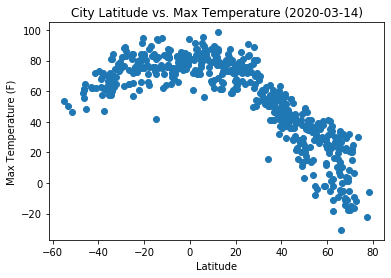

In [11]:
# Create a scatter plot showing the relationship between and latitude and max temp

plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker='o' )
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("LatVsTemp.png")
plt.show()

In [ ]:
#Analysis:  
#The latitude vs. temp plot is showing us that the temperatures around lat 0 are highest.  
#The higher latitudes have the coldest temps

#### Latitude vs. Humidity Plot

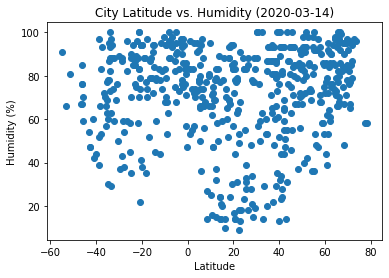

In [12]:
# Create a scatter plot showing the relationship between and latitude and Humidity

plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker='o' )
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("LatVsHumidity.png")
plt.show()

In [ ]:
# Analysis:
#The latitude vs. humidity plot is showing us that humidity levels are not strongly tied to latitude although there
# seems to be a slightly larger concentration of humidity at higher temps.

#### Latitude vs. Cloudiness Plot

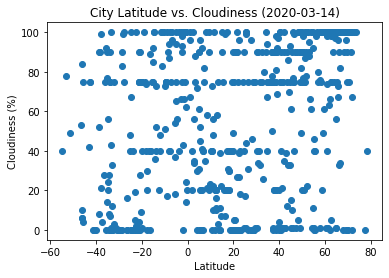

In [13]:
# Create a scatter plot showing the relationship between and latitude and Cloudiness

plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker='o' )
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("LatVsCloudiness.png")
plt.show()

In [ ]:
# Analysis:
#The latitude vs. cloudiness plot is showing us that cloudiness is not strongly tied to latitude.

#### Latitude vs. Wind Speed Plot

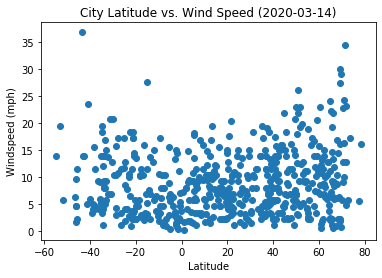

In [14]:
# Create a scatter plot showing the relationship between and latitude and Windspeed

plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker='o' )
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.savefig("LatVsWindspeed.png")
plt.show()

In [ ]:
# Analysis:
# The latitude vs. wind speed plot is showing us that windspeed is not strongly tied to latitude and is pretty similar 
#  for most latitudes.

## Linear Regression

In [15]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_weather_df["Lat"], city_weather_df["Max Temp"])

# Get regression values
regress_values = city_weather_df["Lat"] * slope + intercept
print(regress_values)

0      36.240371
1      55.385521
2      26.695242
3      29.244676
4      70.523546
         ...    
549    41.028183
550    44.474188
551    65.790626
552    29.439848
553    35.490179
Name: Lat, Length: 554, dtype: float64


y = -0.61x +67.42
The r-squared is: -0.7515752741899185


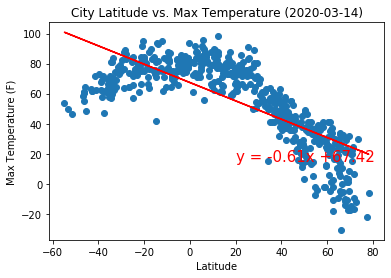

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create a scatter plot showing the relationship between and latitude and max temp

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker='o' )
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.plot(city_weather_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.savefig("LatVsTempLR.png")

# Show plot
plt.show()

In [17]:
# Create Northern Hemisphere DataFrame

northern_df = city_weather_df[city_weather_df["Lat"] >= 0]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,east grinstead,75,GB,1584160377,93,51.12,-0.01,46.40,9.17
1,hilo,90,US,1584160698,83,19.73,-155.09,75.00,14.99
2,zhigansk,82,RU,1584160619,92,66.77,123.37,-5.37,5.99
3,oppdal,75,NO,1584160619,76,62.59,9.69,2.88,9.95
6,qaanaaq,0,GL,1584160711,58,77.48,-69.36,-22.00,5.57


In [18]:
# Create Southern Hemisphere DataFrame

southern_df = city_weather_df[city_weather_df["Lat"] < 0]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,paita,65,PE,1584160619,68,-5.09,-81.11,78.91,5.57
5,esperance,75,AU,1584160061,73,-33.87,121.90,69.80,13.87
7,richards bay,83,ZA,1584160540,87,-28.78,32.04,76.64,15.68
10,vaini,90,TO,1584160714,100,-21.20,-175.20,75.20,18.34
11,hithadhoo,14,MV,1584160715,57,-0.60,73.08,83.80,5.39


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
#  Create a UDF that will work for both the northern and southern hemipheres

def plotting_udf(dframe):

# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Max Temp"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Max Temp"], marker='o' )
    plt.title(f"City Latitude vs. Max Temperature Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (F)")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsTempLR_{dframe}.png")  
# Show plot
    plt.show()

0      31.367514
1      69.867574
2      12.172676
3      17.299476
6      -0.963216
         ...    
549    40.995595
550    47.925361
551    90.791787
552    17.691958
553    29.858910
Name: Lat, Length: 384, dtype: float64
y = -1.23x +94.07
The r-squared is: -0.9015522623546728


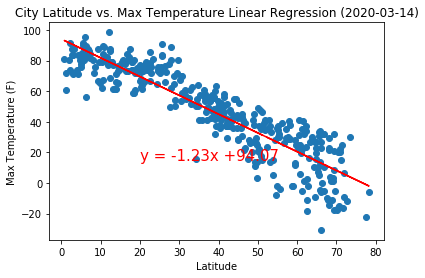

In [30]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

4      80.643150
5      68.627513
7      70.752585
10     73.917232
11     82.517723
         ...    
522    79.444926
536    80.451100
543    76.539129
547    79.962626
548    69.341437
Name: Lat, Length: 170, dtype: float64
y = 0.42x +82.77
The r-squared is: 0.5601976037803676


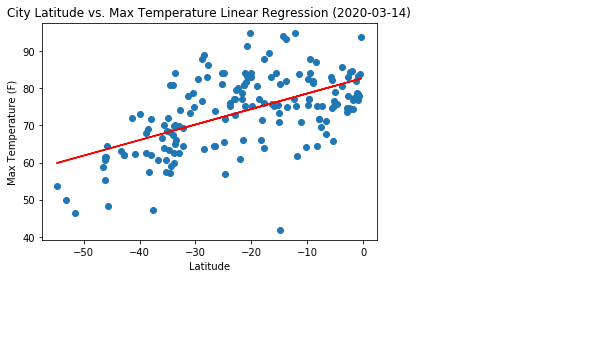

<Figure size 432x288 with 0 Axes>

In [31]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)
# plt.savefig("LatVsTempLR_southern.png") --  why is this empty??

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [32]:
def plotting_udf(dframe):
    
# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Humidity"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Humidity"], marker='o' )
    plt.title(f"City Latitude vs. Humidity Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsHumidityLR_{dframe}.png")  
# Show plot
    plt.show()

0      73.973136
1      64.082275
2      78.904386
3      77.587286
6      82.279064
         ...    
549    71.499633
550    69.719341
551    58.706739
552    77.486455
553    74.360703
Name: Lat, Length: 384, dtype: float64
y = 0.32x +57.87
The r-squared is: 0.28048734653473884


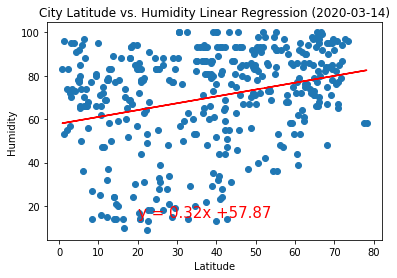

In [33]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

4      82.430255
5      71.358382
7      73.316542
10     76.232622
11     84.157590
         ...    
522    81.326145
536    82.253289
543    78.648583
547    81.803182
548    72.016231
Name: Lat, Length: 170, dtype: float64
y = 0.38x +84.39
The r-squared is: 0.2898545804788767


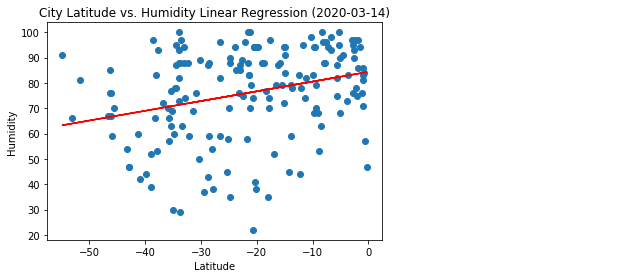

In [34]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)
# plt.savefig("LatVsHumidityLR_southern.png") --  why is this empty??

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [35]:
def plotting_udf(dframe):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Cloudiness"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Cloudiness"], marker='o' )
    plt.title(f"City Latitude vs. Cloudiness Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsCloudinessLR_{dframe}.png")  
# Show plot
    plt.show()

0      63.853428
1      45.022565
2      73.241864
3      70.734281
6      79.666793
         ...    
549    59.144212
550    55.754777
551    34.788270
552    70.542313
553    64.591305
Name: Lat, Length: 384, dtype: float64
y = 0.6x +33.19
The r-squared is: 0.3281873409682085


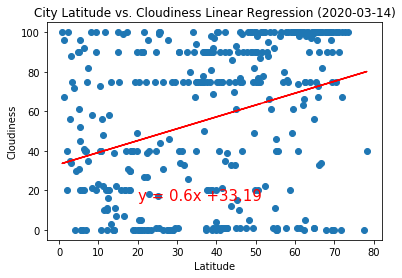

In [36]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)
# plt.savefig("LatVsCloudinessLR_northern.png") --  why is this empty??

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

4      65.942322
5      40.225121
7      44.773437
10     51.546766
11     69.954492
         ...    
522    63.377751
536    65.531276
543    57.158441
547    64.485789
548    41.753141
Name: Lat, Length: 170, dtype: float64
y = 0.89x +70.49
The r-squared is: 0.33126293160671383


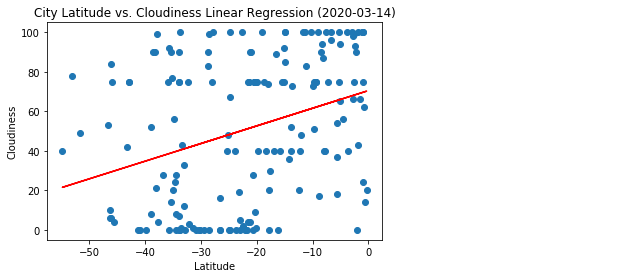

In [37]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)
# plt.savefig("LatVsCloudinessLR_southern.png") --  why is this empty??

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [39]:
def plotting_udf(dframe):
    
    # Perform a linear regression on wind speed vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Wind Speed"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Wind Speed"], marker='o' )
    plt.title(f"City Latitude vs. Wind Speed Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsCloudinessLR_{dframe}.png")  
# Show plot
    plt.show()

0       9.804175
1       8.008316
2      10.699530
3      10.460388
6      11.312262
         ...    
549     9.355067
550     9.031824
551     7.032293
552    10.442080
553     9.874545
Name: Lat, Length: 384, dtype: float64
y = 0.06x +6.88
The r-squared is: 0.20475944939107246


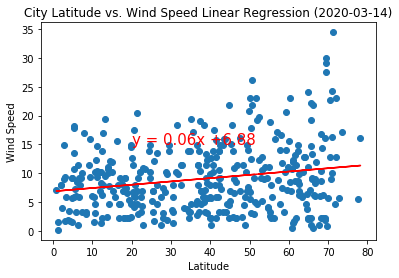

In [40]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)
# plt.savefig("LatVsWindSpeedLR_northern.png") --  why is this empty??

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

4      6.069574
5      9.520932
7      8.910528
10     8.001519
11     5.531124
         ...   
522    6.413750
536    6.124738
543    7.248408
547    6.265047
548    9.315865
Name: Lat, Length: 170, dtype: float64
y = -0.12x +5.46
The r-squared is: -0.27624356929515603


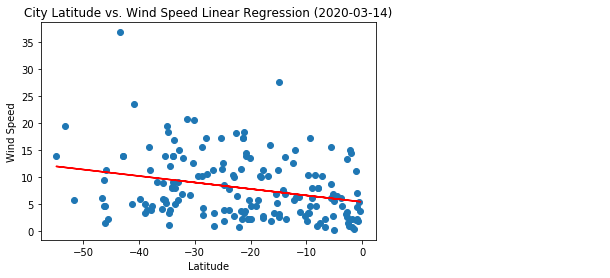

In [41]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)
# plt.savefig("LatVsWindSpeedLR_southern.png") --  why is this empty??